In [3]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [1]:
import tensorflow as tf
import zipfile
import numpy as np
import random
import os
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# # Load the extension and start TensorBoard

# %load_ext tensorboard
# %tensorboard --logdir logs

In [7]:
SEED = 42
np.random.seed = SEED

#UNZIP_PATH = '../input/data-science-bowl-2018/'
#C:\Users\Kasia\Documents\GitHub\CameraXinJava2\app\src\main\assets\processed
TRAIN_PATH = r'C:\Users\Kasia\Documents\GitHub\CameraXinJava2\app\src\main\assets\processed\train'
TEST_PATH = r'C:\Users\Kasia\Documents\GitHub\CameraXinJava2\app\src\main\assets\processed\test'
VAL_PATH = r'C:\Users\Kasia\Documents\GitHub\CameraXinJava2\app\src\main\assets\processed\val'

TRAIN_Y_PATH =r'C:\Users\Kasia\Documents\GitHub\CameraXinJava2\app\src\main\assets\processed\train_labels'
TEST_Y_PATH= r'C:\Users\Kasia\Documents\GitHub\CameraXinJava2\app\src\main\assets\processed\test_labels'
VAL_Y_PATH =r'C:\Users\Kasia\Documents\GitHub\CameraXinJava2\app\src\main\assets\processed\val_labels'


IMG_WIDTH_TEST = 800 #512
IMG_HEIGHT_TEST = 800 #384
IMG_CHANNELS_TEST = 3

IMG_WIDTH_TRAIN = 800 #512
IMG_HEIGHT_TRAIN = 800 #384
IMG_CHANNELS_TRAIN = 3

In [8]:
from PIL import Image

In [9]:
for element in os.listdir(TEST_Y_PATH):
    print(element)
    image = plt.imread(os.path.join(TEST_Y_PATH, element))
    print(image.shape)

4c46b91a-e402-11e8-97db-0242ac1c0002.jpg
(800, 800, 3)
4c4a6402-e402-11e8-97db-0242ac1c0002.jpg
(800, 800, 3)


In [10]:
# get list of all subfolders
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]
val_ids = next(os.walk(VAL_PATH))[1]

2it [00:00, 30.13it/s]
4it [00:00, 93.81it/s]
46it [00:00, 94.73it/s]


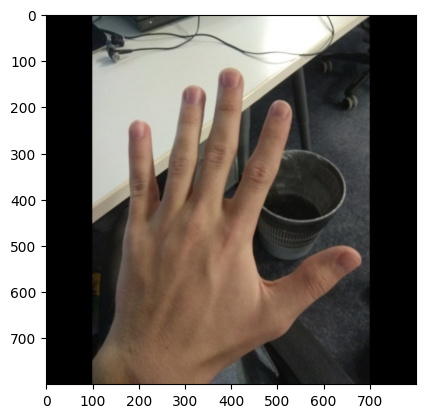

In [11]:
X_test = np.zeros((len(os.listdir(TEST_PATH)), IMG_WIDTH_TEST, IMG_HEIGHT_TEST, IMG_CHANNELS_TEST))

for i, element in tqdm(enumerate(os.listdir(TEST_PATH))):
    image = plt.imread(os.path.join(TEST_PATH, element))
    X_test[i] = image
    plt.imshow(image)



Val_train = np.zeros((len(os.listdir(VAL_PATH)), IMG_WIDTH_TRAIN, IMG_HEIGHT_TRAIN, IMG_CHANNELS_TRAIN))

for i, element in tqdm(enumerate(os.listdir(VAL_PATH))):
    image = plt.imread(os.path.join(VAL_PATH, element))
    Val_train[i] = image

    
X_train = np.zeros((len(os.listdir(TRAIN_PATH)), IMG_WIDTH_TRAIN, IMG_HEIGHT_TRAIN, IMG_CHANNELS_TRAIN))

for i, element in tqdm(enumerate(os.listdir(TRAIN_PATH))):
    image = plt.imread(os.path.join(TRAIN_PATH, element))
    X_train[i] = image

In [12]:
Y_train = np.zeros((len(os.listdir(TRAIN_Y_PATH)), IMG_WIDTH_TEST, IMG_HEIGHT_TEST))

for i, element in tqdm(enumerate(os.listdir(TRAIN_Y_PATH))):
    image = plt.imread(os.path.join(TRAIN_Y_PATH, element))
    Y_train[i] = np.where(np.mean(image, axis=2) > 254, 1, 0)


Y_valid = np.zeros((len(os.listdir(VAL_Y_PATH)), IMG_WIDTH_TEST, IMG_HEIGHT_TEST))

for i, element in tqdm(enumerate(os.listdir(VAL_Y_PATH))):
    image = plt.imread(os.path.join(VAL_Y_PATH, element))
    Y_valid[i] = np.where(np.mean(image, axis=2) > 254, 1, 0)

Y_test = np.zeros((len(os.listdir(TEST_Y_PATH)), IMG_WIDTH_TRAIN, IMG_HEIGHT_TRAIN))

for i, element in tqdm(enumerate(os.listdir(TEST_Y_PATH))):
    image = plt.imread(os.path.join(TEST_Y_PATH, element))
    Y_test[i] = np.where(np.mean(image, axis=2) > 254, 1, 0)
    # print(Y_test[i].shape, np.mean(Y_test[i], axis=2).shape, np.unique(np.where(np.mean(Y_test[i], axis=2) > 250, 1, 0)))
    # plt.figure()
    # plt.imshow(image)
    # plt.show()

    # plt.figure()
    # plt.imshow(Y_test[i], cmap='binary_r')
    # plt.show()

46it [00:00, 61.08it/s]
4it [00:00, 57.94it/s]
2it [00:00, 66.75it/s]


In [13]:
IMAGE_WIDTH = IMG_WIDTH_TRAIN 
IMAGE_HEIGHT = IMG_HEIGHT_TRAIN
IMG_CHANNELS = IMG_CHANNELS_TRAIN


In [17]:
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Concatenate

In [18]:
inputs = tf.keras.layers.Input((IMG_WIDTH_TRAIN, IMG_HEIGHT_TRAIN, IMG_CHANNELS_TRAIN))
s = tf.keras.layers.Lambda(lambda x: x/255.0)(inputs) # normalization

# Contraction path
c1 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(s) # start with normal distributed weights
c1 = tf.keras.layers.BatchNormalization()(c1)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(c1)
c1 = tf.keras.layers.BatchNormalization()(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(p1)
c2 = tf.keras.layers.BatchNormalization()(c2)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(c2)
c2 = tf.keras.layers.BatchNormalization()(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(p2)
c3 = tf.keras.layers.BatchNormalization()(c3)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(c3)
c3 = tf.keras.layers.BatchNormalization()(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(p3)
c4 = tf.keras.layers.BatchNormalization()(c4)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(c4)
c4 = tf.keras.layers.BatchNormalization()(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(p4)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation="relu", kernel_initializer = "he_normal", padding = "same")(c5)
c5 = tf.keras.layers.BatchNormalization()(c5)

# Expansive path
# Expansive path

def upsample_block(x, skip_connection, filters):
    x = UpSampling2D((2, 2))(x)
    x = Concatenate()([x, skip_connection])
    x = Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    return x
up_conv4 = upsample_block(c5, c4, 128)
up_conv3 = upsample_block(up_conv4, c3, 64)
up_conv2 = upsample_block(up_conv3, c2, 32)
up_conv1 = upsample_block(up_conv2, c1, 16)

outputs = Conv2D(1, (1, 1), activation='sigmoid')(up_conv1)





In [19]:
# Dice similarity function
import keras.backend as K

def dice_coef(y_true, y_pred, smooth=100):        
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return dice


In [20]:

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 800, 800, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_2 (Lambda)              (None, 800, 800, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 800, 800, 16  448         ['lambda_2[0][0]']               
                                )                                                                 
                                                                                              

In [21]:
# Callbacks
# checkpoiter = tf.keras.callbacks.ModelCheckpoint('model.h5', verbose = 1, save_best_only = True)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir = 'logs')
            ]

In [22]:
results = model.fit(
    X_train, 
    Y_train, 
    #validation_split = 0.1, 
    validation_data=(Val_train, Y_valid),
    batch_size = 16, 
    epochs = 18, 
    callbacks = callbacks)


Epoch 1/20
3/3 [==============================] - 166s 51s/step - loss: 0.2427 - dice_coef: 0.0522 - val_loss: 0.3410 - val_dice_coef: 0.0441
Epoch 2/20
3/3 [==============================] - 154s 52s/step - loss: 0.1142 - dice_coef: 0.1046 - val_loss: 0.3804 - val_dice_coef: 0.0490
Epoch 3/20
3/3 [==============================] - 156s 52s/step - loss: 0.1115 - dice_coef: 0.0932 - val_loss: 0.4437 - val_dice_coef: 0.0422
Epoch 4/20
3/3 [==============================] - 146s 46s/step - loss: 0.1051 - dice_coef: 0.1062 - val_loss: 0.4043 - val_dice_coef: 0.0448
Epoch 5/20
3/3 [==============================] - 149s 49s/step - loss: 0.0971 - dice_coef: 0.1455 - val_loss: 0.3331 - val_dice_coef: 0.0615
Epoch 6/20
3/3 [==============================] - 157s 53s/step - loss: 0.0931 - dice_coef: 0.1935 - val_loss: 0.2799 - val_dice_coef: 0.0612
Epoch 7/20
3/3 [==============================] - 154s 51s/step - loss: 0.0902 - dice_coef: 0.2028 - val_loss: 0.2623 - val_dice_coef: 0.0654
Epoch 

In [23]:
model.save('chat_model.h5')

dependencies = {'dice_coef': dice_coef}

modell = tf.keras.models.load_model('chat_model.h5', custom_objects=dependencies)

In [24]:
modell.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 800, 800, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_2 (Lambda)              (None, 800, 800, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 800, 800, 16  448         ['lambda_2[0][0]']               
                                )                                                                 
                                                                                              

In [25]:
# Predictions
idx = random.randint(0, len(X_train))

preds_train = modell.predict(X_train[:int(X_train.shape[0]*0.9)], verbose = 1)
preds_val = modell.predict(X_train[int(X_train.shape[0]*0.9):], verbose = 1)
preds_test = modell.predict(X_test, verbose = 1)

preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

1/1 [==============================] - 1s 730ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


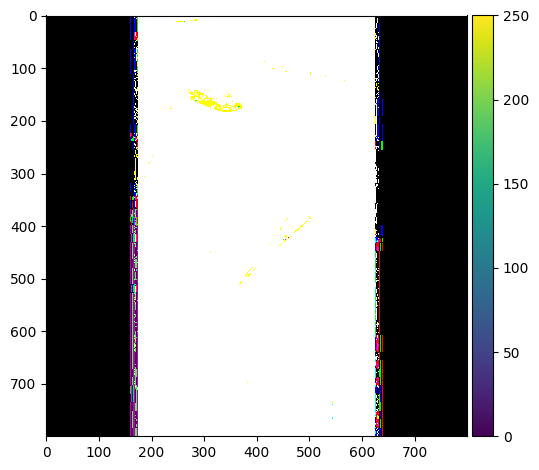

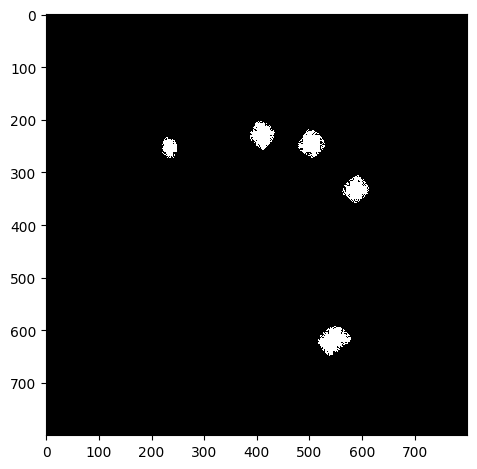

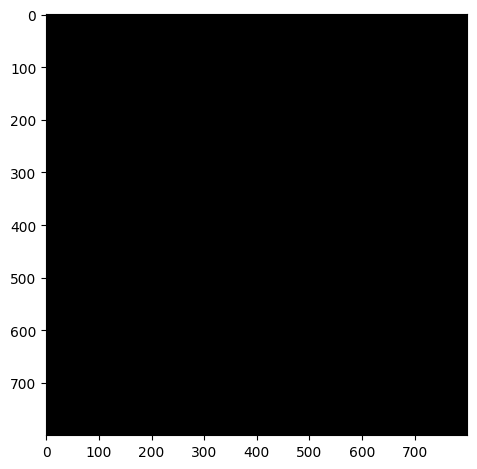

In [26]:
# Sanity check on random val samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(X_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()